In [1]:
import imageio
import numpy as np
from scipy import signal, ndimage
import matplotlib.pyplot as plt


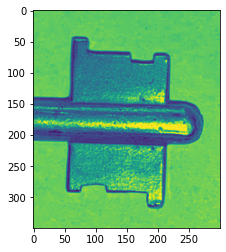

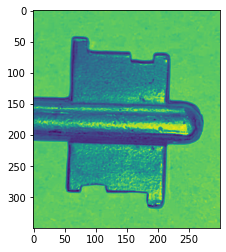

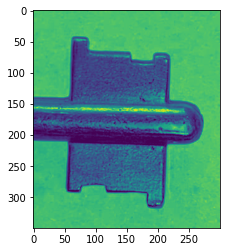

In [116]:
%matplotlib inline
im = imageio.imread('llave_fondo_blanco.jpeg')
im = im[450:800,350:650,:]
plt.imshow(im[:,:,0])
plt.show()
plt.imshow(im[:,:,1])
plt.show()
plt.imshow(im[:,:,2])
plt.show()

In [123]:
def plotear_con_coord(im, punto=None):
    plt.imshow(im)
    xlen = im.shape[1]
    ylen = im.shape[0]
    if punto:
        xpunto = punto[0]
        ypunto = punto[1]
        plt.plot([0,xlen],[ypunto,ypunto])
        plt.plot([xpunto,xpunto], [0,ylen])
    plt.xlim([0,xlen])
    plt.ylim([ylen,0])
    plt.show()
    return 

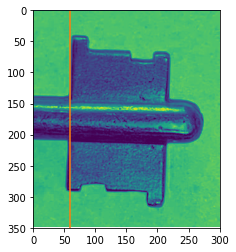

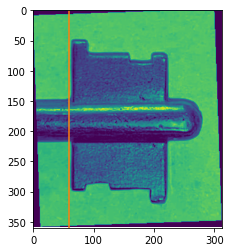

In [128]:
im_az = im[:,:,2]

plotear_con_coord(im_az, punto=[60,0])
plt.show()

angulo = 2
im_rot = ndimage.rotate(im_az, angulo)

plotear_con_coord(im_rot, punto=[60,0])
plt.show()

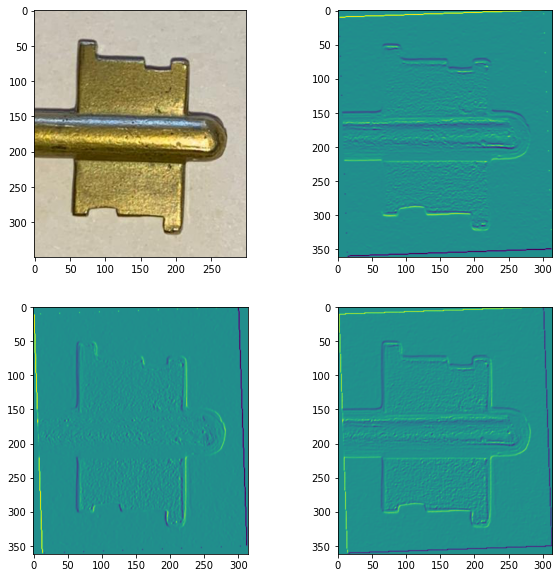

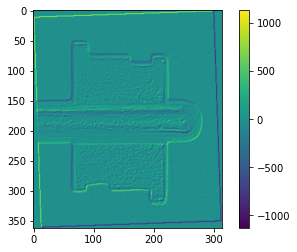

In [149]:
%matplotlib inline

kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
#kernel = kernel * -1

fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0][0].imshow(im)


H = signal.convolve2d(im_rot, kernel)
V = signal.convolve2d(im_rot, np.transpose(kernel))

axs[1][0].imshow(V)
axs[0][1].imshow(H)

bordes = H + V
axs[1][1].imshow(bordes)
plt.show()

plt.imshow(bordes)
plt.colorbar()
plt.show()
	


(320, 280)


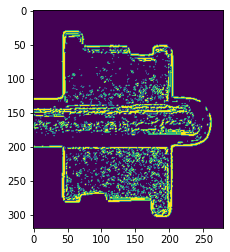

In [302]:
#Binarizo la imagen
filtro1 = (bordes>150)
filtro2 = (bordes<-150)
im_bin = np.zeros(bordes.shape)
im_bin[filtro1] = 1
im_bin[filtro2] = 1

im_bin = im_bin[20:340,20:300]
print(im_bin.shape)
plt.imshow(im_bin)

In [303]:
def tomar_borde(imagen, inicio=[0,0],fin=[-1, -1] , direccion=True, cambiar_eje=False):
    puntos = []
    fil = inicio[0]
    col = inicio[1]
    fila_fin = fin[0]
    col_fin = fin[1]

    if cambiar_eje: #Tomar bordes verticales
      if direccion: #Tomar desde izquierda a derecha
        while fil < fila_fin:
            supero_col=False
            col = inicio[1]
            pix = imagen[fil, col]
            while not pix and col < col_fin:
                col = col + 1
                pix = imagen[fil, col]
                if col == col_fin:
                  supero_col=True
            if not supero_col:
              puntos.append([col, fil])
            fil += 1
      else: #Tomar desde derecha a izquierda
          while fil < fila_fin:
              supero_col = False
              col = inicio[1]
              pix = imagen[fil, col]
              while not pix and col > col_fin:
                  col = col - 1
                  pix = imagen[fil, col]
                  if col == col_fin:
                    supero_col=True
              if not supero_col:
                puntos.append([col, fil])
              fil += 1
    else: #Tomar bordes horizontales
      if direccion: #Tomar desde abajo para arriba
          while col < col_fin: 
              supero_fila = False
              fil = inicio[0]
              pix = imagen[fil, col]
              while not pix and fil > fila_fin:
                  fil = fil - 1
                  pix = imagen[fil, col]
                  if fil == fila_fin:
                    supero_fila = True
              if not supero_fila:
                puntos.append([col, fil])
              col += 1
      else: #Tomar desde arriba para abajo
          while col < col_fin:
              supero_fila = False
              fil = inicio[0]
              pix = imagen[fil, col]
              while not pix and fil < fila_fin:
                  fil = fil + 1
                  pix = imagen[fil, col]
                  if fil == fila_fin:
                    supero_fila = True
              if not supero_fila:
                puntos.append([col, fil])
              col += 1
    return np.array(puntos)
    

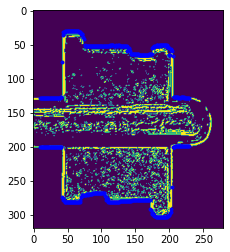

In [304]:
#Tomo los puntos del borde de la imagen

#plotear_con_coord(im_bin, punto=[10,310])

puntos_abajo = tomar_borde(im_bin, inicio=[310,10], fin=[190,230])
puntos_arriba = tomar_borde(im_bin, inicio=[0,10], fin=[150,230], direccion=False)


plt.imshow(im_bin)
plt.plot(puntos_abajo[:,0], puntos_abajo[:,1], '.b')
plt.plot(puntos_arriba[:,0], puntos_arriba[:,1], '.b')
plt.show()

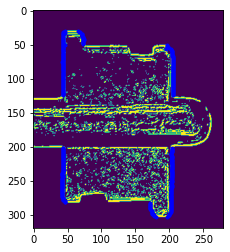

In [305]:
#saco las coord de los bordes verticales

puntos_izq_ab = tomar_borde(im_bin, inicio=[202,10], fin=[310,200], cambiar_eje=True)
puntos_izq_ar = tomar_borde(im_bin, inicio=[10,10], fin=[125,200], cambiar_eje=True)
puntos_der_ab = tomar_borde(im_bin, inicio=[202,250], fin=[310, 10], direccion=False, cambiar_eje=True)
puntos_der_ar = tomar_borde(im_bin, inicio=[10,250], fin=[125, 10], direccion=False, cambiar_eje=True)

plt.imshow(im_bin)
plt.plot(puntos_izq_ab[:,0], puntos_izq_ab[:,1], '.b')
plt.plot(puntos_izq_ar[:,0], puntos_izq_ar[:,1], '.b')
plt.plot(puntos_der_ab[:,0], puntos_der_ab[:,1], '.b')
plt.plot(puntos_der_ar[:,0], puntos_der_ar[:,1], '.b')

#plt.plot(puntos_arriba[:,0], puntos_arriba[:,1], '.r')
plt.show()


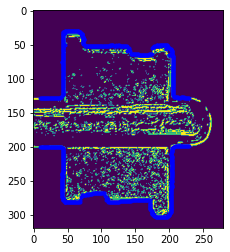

In [306]:
#Junto todos los puntos que son del borde de la llave en un solo array:

borde_llave = np.concatenate((puntos_der_ab, puntos_der_ar, puntos_izq_ab, puntos_izq_ar, puntos_abajo, puntos_arriba))
plt.plot(borde_llave[:,0], borde_llave[:,1], '.b')
plt.imshow(im_bin)
plt.show()

(430, 420)
(430, 420)


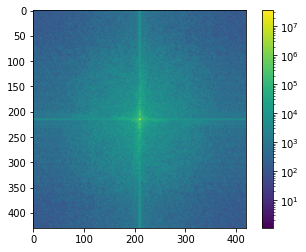

In [220]:
from matplotlib.colors import LogNorm
%matplotlib inline
im_fft = np.fft.fft2(im_roja, im_roja.shape)
print(im_roja.shape)
print(im_fft.shape)
#plt.imshow(im_fft_mod, norm=LogNorm())
#plt.show()
im_fft_shift = np.fft.fftshift(im_fft)
im_fft_mod = np.abs(im_fft_shift)
plt.imshow(im_fft_mod, norm=LogNorm())
plt.colorbar()
plt.show()



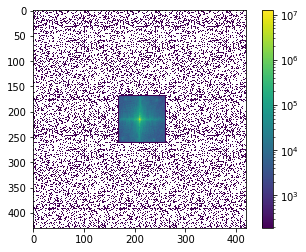

In [103]:
filtrov_fft = 210
filtroh_fft = 210

#fft_recortada = np.zeros(im_fft_inv_mod.shape, dtype=complex)
#print(fft_recortada)
#plt.imshow(np.abs(fft_recortada))
#plt.show()
#print(im_fft_shift[(215 - filtroh_fft): (215 + filtroh_fft), (210 - filtrov_fft): (210 + filtrov_fft)].shape)
fft_recortada = np.copy(im_fft_shift)
fft_recortada[:,:170] = 0
fft_recortada[:,260:] = 0
fft_recortada[260:,170:265] = 0
fft_recortada[:170, 170:265] = 0

#fft_recortada[(215 - filtroh_fft): (215 + filtroh_fft), (210 - filtrov_fft): (210 + filtrov_fft)] = im_fft_shift[(215 - filtroh_fft): (215 + filtroh_fft), (210 - filtrov_fft): (210 + filtrov_fft)] 
plt.imshow(np.abs(fft_recortada), norm=LogNorm())
#print(np.abs(fft_recortada[215:215+18,210:210+18]))
plt.colorbar()
plt.show()

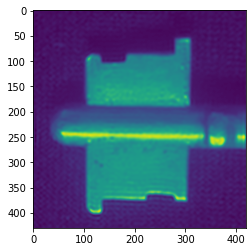

In [104]:
imafft = np.fft.fftshift(fft_recortada)
imafft = np.fft.ifft2(imafft, imafft.shape)
imafft_mod = np.abs(imafft)

plt.imshow(imafft_mod)
plt.show()